In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly as py
from plotly.offline import init_notebook_mode,iplot,plot
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict

In [10]:
anime = pd.read_csv("anime_TV.csv")
movies = pd.read_csv("Movies.csv")

In [11]:
print(anime.shape)
print(movies.shape)

(6761729, 10)
(1051998, 10)


In [12]:
anime.head()

,Unnamed: 0,anime_id,anime_name,genre,type,episodes,rating,members,user_id,user_rating
0,2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10
1,2200,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,10,10
2,2201,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,11,8
3,2202,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,12,9
4,2203,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,17,10


In [25]:
anime.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [26]:
anime.isnull().sum()

anime_id       0
anime_name     0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
user_rating    0
dtype: int64

In [14]:
anime.genre.fillna("NULL",inplace = True)
anime.type.fillna("NULL",inplace = True)

In [15]:
anime.isnull().sum()

Unnamed: 0     0
anime_id       0
anime_name     0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
user_rating    0
dtype: int64

# Let's Visualizes Anime Series First

In [ ]:
anime_type = anime.type.value_counts()
sns.barplot(x = anime_type.index,y = anime_type.values,palette = "muted").set_title("Anime Types")
plt.tight_layout()
plt.show()

In [24]:
df1 = anime.groupby(['anime_name'])['user_rating'].count().reset_index().sort_values(by="user_rating",ascending=False).head(10)

trace1 = go.Bar(
    x = df1.anime_name,
    y = df1.user_rating,
    marker = dict(color = "rgba(255,255,0,0.5)" , line = dict(color = 'rgb(0,0,0)' , width = 1.5))
)
layout = go.Layout(barmode = 'group')
data = [trace1]
fig = go.Figure(data = data,layout = layout)
iplot(fig)

In [38]:
df2= anime[['anime_name', 'members']].sort_values(by = 'members',ascending = False)
anime_name = df2.anime_name.unique()[:10]
members = df2.members.unique()[:10]
data = [go.Bar(
        x = anime_name,
        y = members,
        marker = dict(color = "rgba(0,255,0,0.5)" , line = dict(color = 'rgb(0,0,0)' , width = 1.5))
)]
layout = go.Layout(barmode = 'group')

fig = go.Figure(data=data,layout=layout)
iplot(fig)

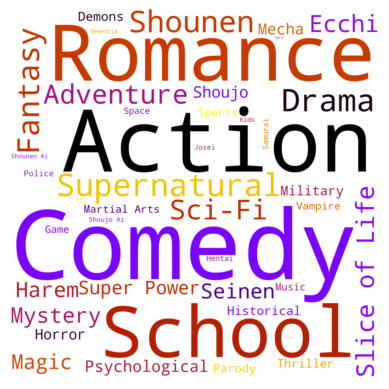

In [47]:
df3 = anime[anime.genre != 'NULL']
all_genres = defaultdict(int)

for genres in df3['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1
genres_cloud = WordCloud(width=1400, height=1400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

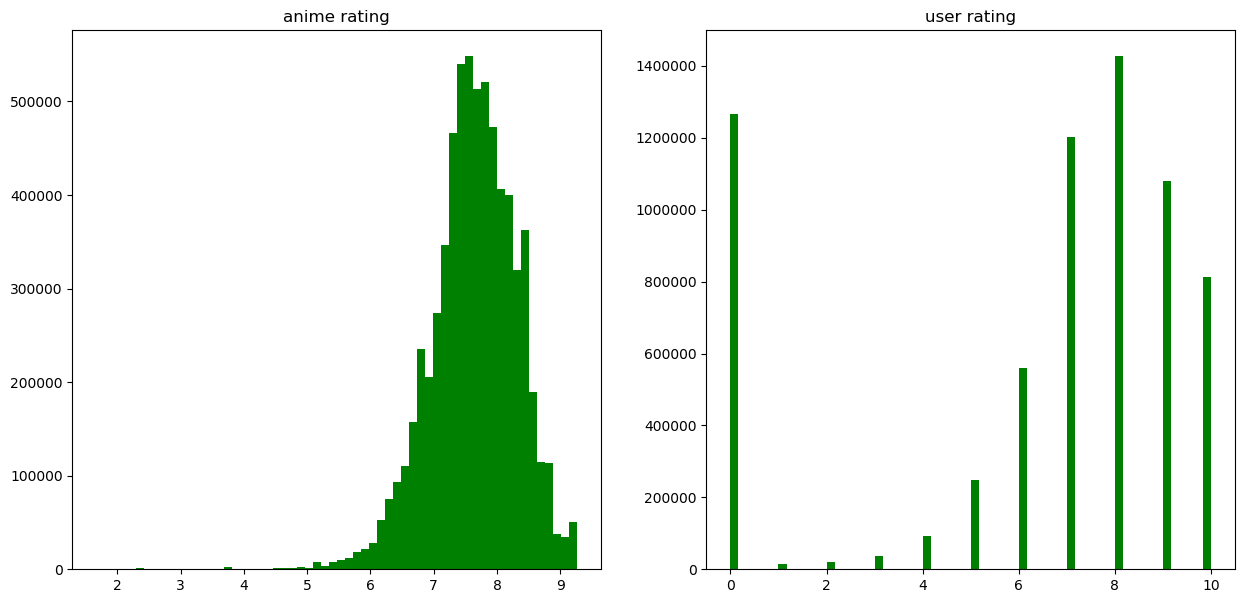

In [56]:
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
plt.hist(anime['rating'],bins = 60,color = 'green')
plt.title('anime rating')
plt.subplot(1,2,2)
plt.hist(anime['user_rating'],bins = 60,color = 'green')
plt.title('user rating')
plt.show()

# Visualization anime movies

In [ ]:
movies_type = movies.type.value_counts()
sns.barplot(x = movies_type.index,y = movies_type.values,palette = "muted").set_title("Movies Types")
plt.tight_layout()
plt.show()

In [57]:
df1 = movies.groupby(['anime_name'])['user_rating'].count().reset_index().sort_values(by="user_rating",ascending=False).head(10)

trace1 = go.Bar(
    x = df1.anime_name,
    y = df1.user_rating,
    marker = dict(color = "rgba(255,255,0,0.5)" , line = dict(color = 'rgb(0,0,0)' , width = 1.5))
)
layout = go.Layout(barmode = 'group')
data = [trace1]
fig = go.Figure(data = data,layout = layout)
iplot(fig)

In [58]:
df2= movies[['anime_name', 'members']].sort_values(by = 'members',ascending = False)
anime_name = df2.anime_name.unique()[:10]
members = df2.members.unique()[:10]
data = [go.Bar(
        x = anime_name,
        y = members,
        marker = dict(color = "rgba(0,255,0,0.5)" , line = dict(color = 'rgb(0,0,0)' , width = 1.5))
)]
layout = go.Layout(barmode = 'group')

fig = go.Figure(data=data,layout=layout)
iplot(fig)

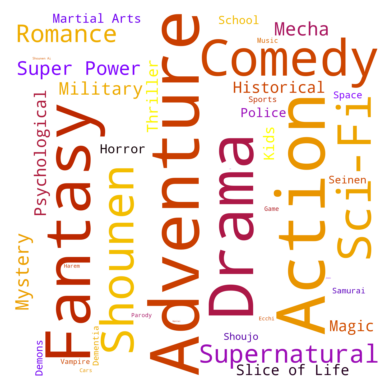

In [64]:
df3 = movies[movies.genre != 'NULL']
all_genres = defaultdict(int)

for genres in df3['genre']:
    for genre in str(genres).split(','):
        all_genres[genre.strip()] += 1
genres_cloud = WordCloud(width=1400, height=1400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

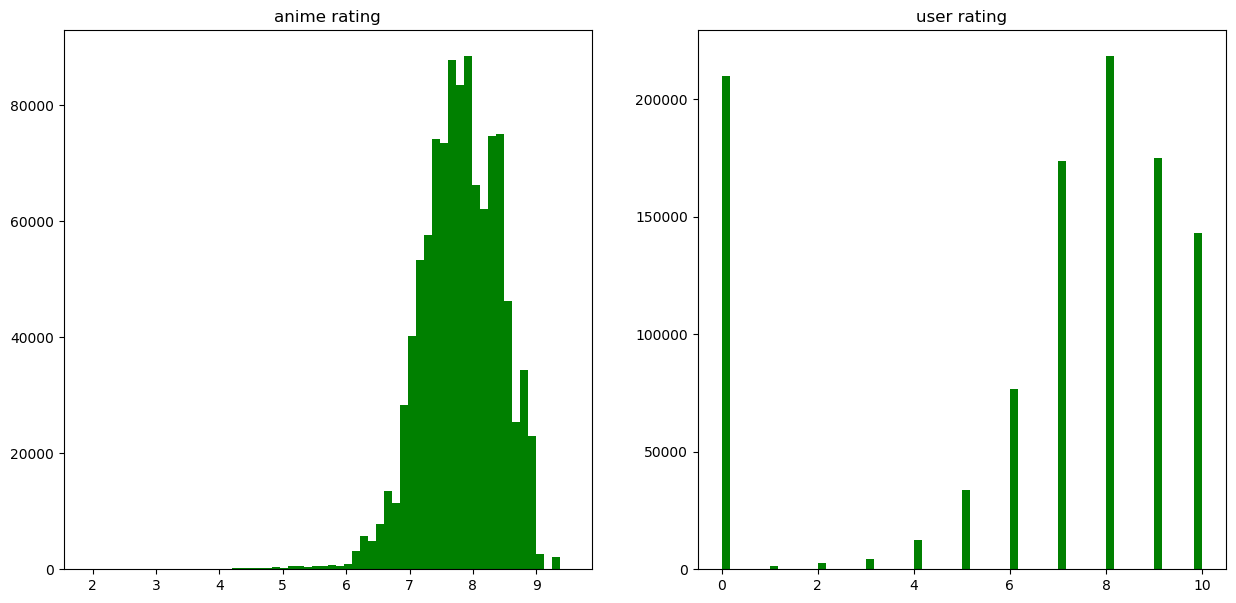

In [65]:
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
plt.hist(movies['rating'],bins = 60,color = 'green')
plt.title('movies rating')
plt.subplot(1,2,2)
plt.hist(movies['user_rating'],bins = 60,color = 'green')
plt.title('user rating')
plt.show()